In [205]:
import requests
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas

## Inputs to the API

In [38]:

event_id = '1065405';
instance_id = ''
batch_size = 100;
approximate_total_results = 7200; #use an upper bound rather than a lowerbound
starting_indices = [x for x in range(int(approximate_total_results/batch_size))]

url_gen = lambda index: 'https://results.athlinks.com/event/1065405?from=%s&limit=100' % (index*batch_size)
urls = list(map(url_gen,starting_indices))


## Getting the raw data

In [40]:
data_getter = lambda url: requests.get(url).json()
raw_data = list(map(data_getter, urls))
total_athlete_count = raw_data[0][0]['totalAthletes']


## Converting the response into a dataframe with only fields we want

In [202]:
data_array = [ x[0]['interval']['intervalResults'] for x in raw_data ];
joined_data = np.concatenate(data_array)

for entry in joined_data:
    entry['time_minutes'] =  entry['time']['timeInMillis']/(60*1000); #converting milliseconds into minutes

fields_to_keep = [ 'displayName', 'gender', 'age', 'bib', 'locality', 'region', 'country', 'overallRank', 'time_minutes', ]
joined_data = [ {field: x[field] for field in fields_to_keep} for x in joined_data]

df = pd.DataFrame.from_dict(joined_data)
df.head(20)


,displayName,gender,age,bib,locality,region,country,overallRank,time_minutes
0,Patrick Spychalski,M,23,306,Mount Pleasant,South Carolina,US,1,15.083333
1,Elliott Schultz,M,24,1065,Charlotte,North Carolina,US,2,15.400000
2,Alex Marchek,M,26,1105,West Union,South Carolina,US,3,15.416667
3,Lauren Goss,F,35,59,Boulder,Colorado,US,4,15.666667
4,Drew Harris,M,31,181,SPARTANBURG,South Carolina,US,5,15.766667
5,Chris Bailey,M,34,237,Charleston,South Carolina,US,6,15.850000
6,Jason Dimery,M,41,10,Lexington,South Carolina,US,7,15.883333
7,Matthew DeMarco,M,29,735,North Charleston,South Carolina,US,8,15.916667
8,Andrew Brown,M,27,1264,Charleston,South Carolina,US,9,16.266667
9,James Tyler,M,16,1215,Isle of Palms,South Carolina,US,10,16.266667


In [211]:
df.to_csv( './data/2023_charleston_race_results.csv');

In [114]:
df.median()

age               36.000000
bib             3898.500000
overallRank     3569.000000
time_minutes      36.533333
dtype: float64

In [209]:
#df[df['displayName'] == 'Kirsten Sims'] 
df[df['region'] == 'Scotland'] 


,displayName,gender,age,bib,locality,region,country,overallRank,time_minutes
42,Sam Mcinnes,F,22,962,Tillicoultry,Scotland,GB,43,17.983333
475,Tom Mcinnes,M,63,961,Tillicoultry,Scotland,GB,476,23.266667
1899,Susan Mcinnes,F,61,4488,Tillicoultry,Scotland,GB,1900,29.533333


In [203]:
region_mapping = df.groupby(['country', 'region'])['bib'].count();


country  region              
AU       New South Wales            2
CA       British Columbia           2
         Ontario                    1
DE       -                          2
DK       -                          1
FI       Uusimaa                    1
GB       Scotland                   3
IT       Rimini                     2
US       Alabama                   24
         Alaska                     2
         Arizona                    8
         Arkansas                   7
         California                48
         Colorado                  70
         Connecticut               50
         Delaware                   3
         District of Columbia      39
         Florida                  232
         Georgia                  262
         Hawaii                     2
         Idaho                      5
         Illinois                  77
         Indiana                   34
         Iowa                       8
         Kansas                    11
         Kentucky   

(array([  5.,   1.,   1.,   0.,   7.,   7.,  17.,  35.,  50.,  69.,  89.,
         87., 104.,  99., 114., 110., 131., 111., 115., 127., 144.,  99.,
        130., 136., 167., 143., 146., 139., 147., 144., 124., 127., 135.,
        143., 125., 143., 114., 119., 112., 116., 114., 139., 118., 116.,
        138., 108., 113., 138., 131., 100., 124.,  91., 134., 128., 124.,
        122., 103.,  98., 114.,  99.,  90.,  74.,  87.,  59.,  63.,  57.,
         49.,  46.,  45.,  35.,  39.,  40.,  28.,  25.,  24.,  21.,  24.,
          9.,   8.,   8.,   4.,   6.,   4.,   2.,   0.,   1.,   0.,   2.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  4

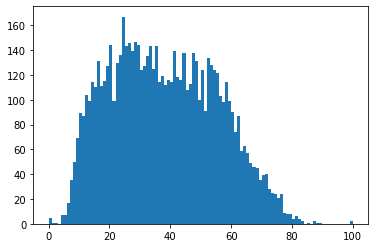

In [122]:
plt.hist(df['age'], bins = 100)

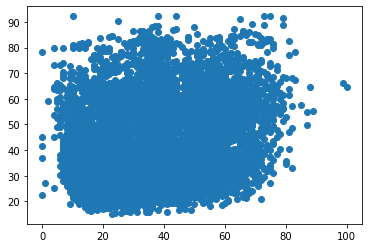

In [117]:
plt.scatter(df['age'], df['time_minutes'])

In [124]:
df.groupby(['age']).mean()

,overallRank,time_minutes
age,,
0,3928.600000,44.833333
1,1252.000000,26.983333
2,5811.000000,59.083333
4,5264.571429,57.857143
5,5679.000000,57.976190
...,...,...
87,5134.000000,52.283333
88,6323.000000,64.616667
89,5429.000000,55.366667


In [129]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_bin'] = pd.cut( df.age, bins)

In [172]:
age_stats = df.groupby(['age_bin']).mean().reset_index(); age_stats
age_stats.describe()

,age,overallRank,time_minutes
count,9.000000,9.000000,9.000000
mean,45.326179,4061.866779,45.869916
std,26.123548,954.061228,7.728024
min,8.420290,2891.962347,36.934311
25%,25.608000,3533.512821,41.506054
50%,45.426122,3996.134058,43.626751
75%,64.770758,4573.323105,49.674398
max,83.294118,5643.529412,59.198039


<BarContainer object of 9 artists>

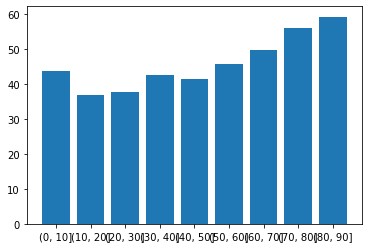

In [180]:
bins_to_plot = [ str(x) for x in age_stats['age_bin']]
time_minutes_to_plot = list(age_stats['time_minutes'])
plt.bar( bins_to_plot, time_minutes_to_plot)